In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

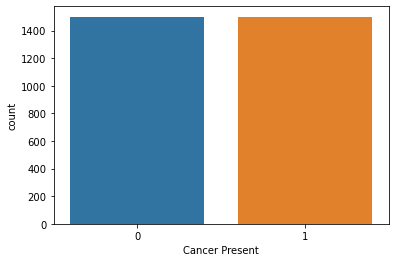

In [6]:
sns.countplot(data=df, x='Cancer Present')

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

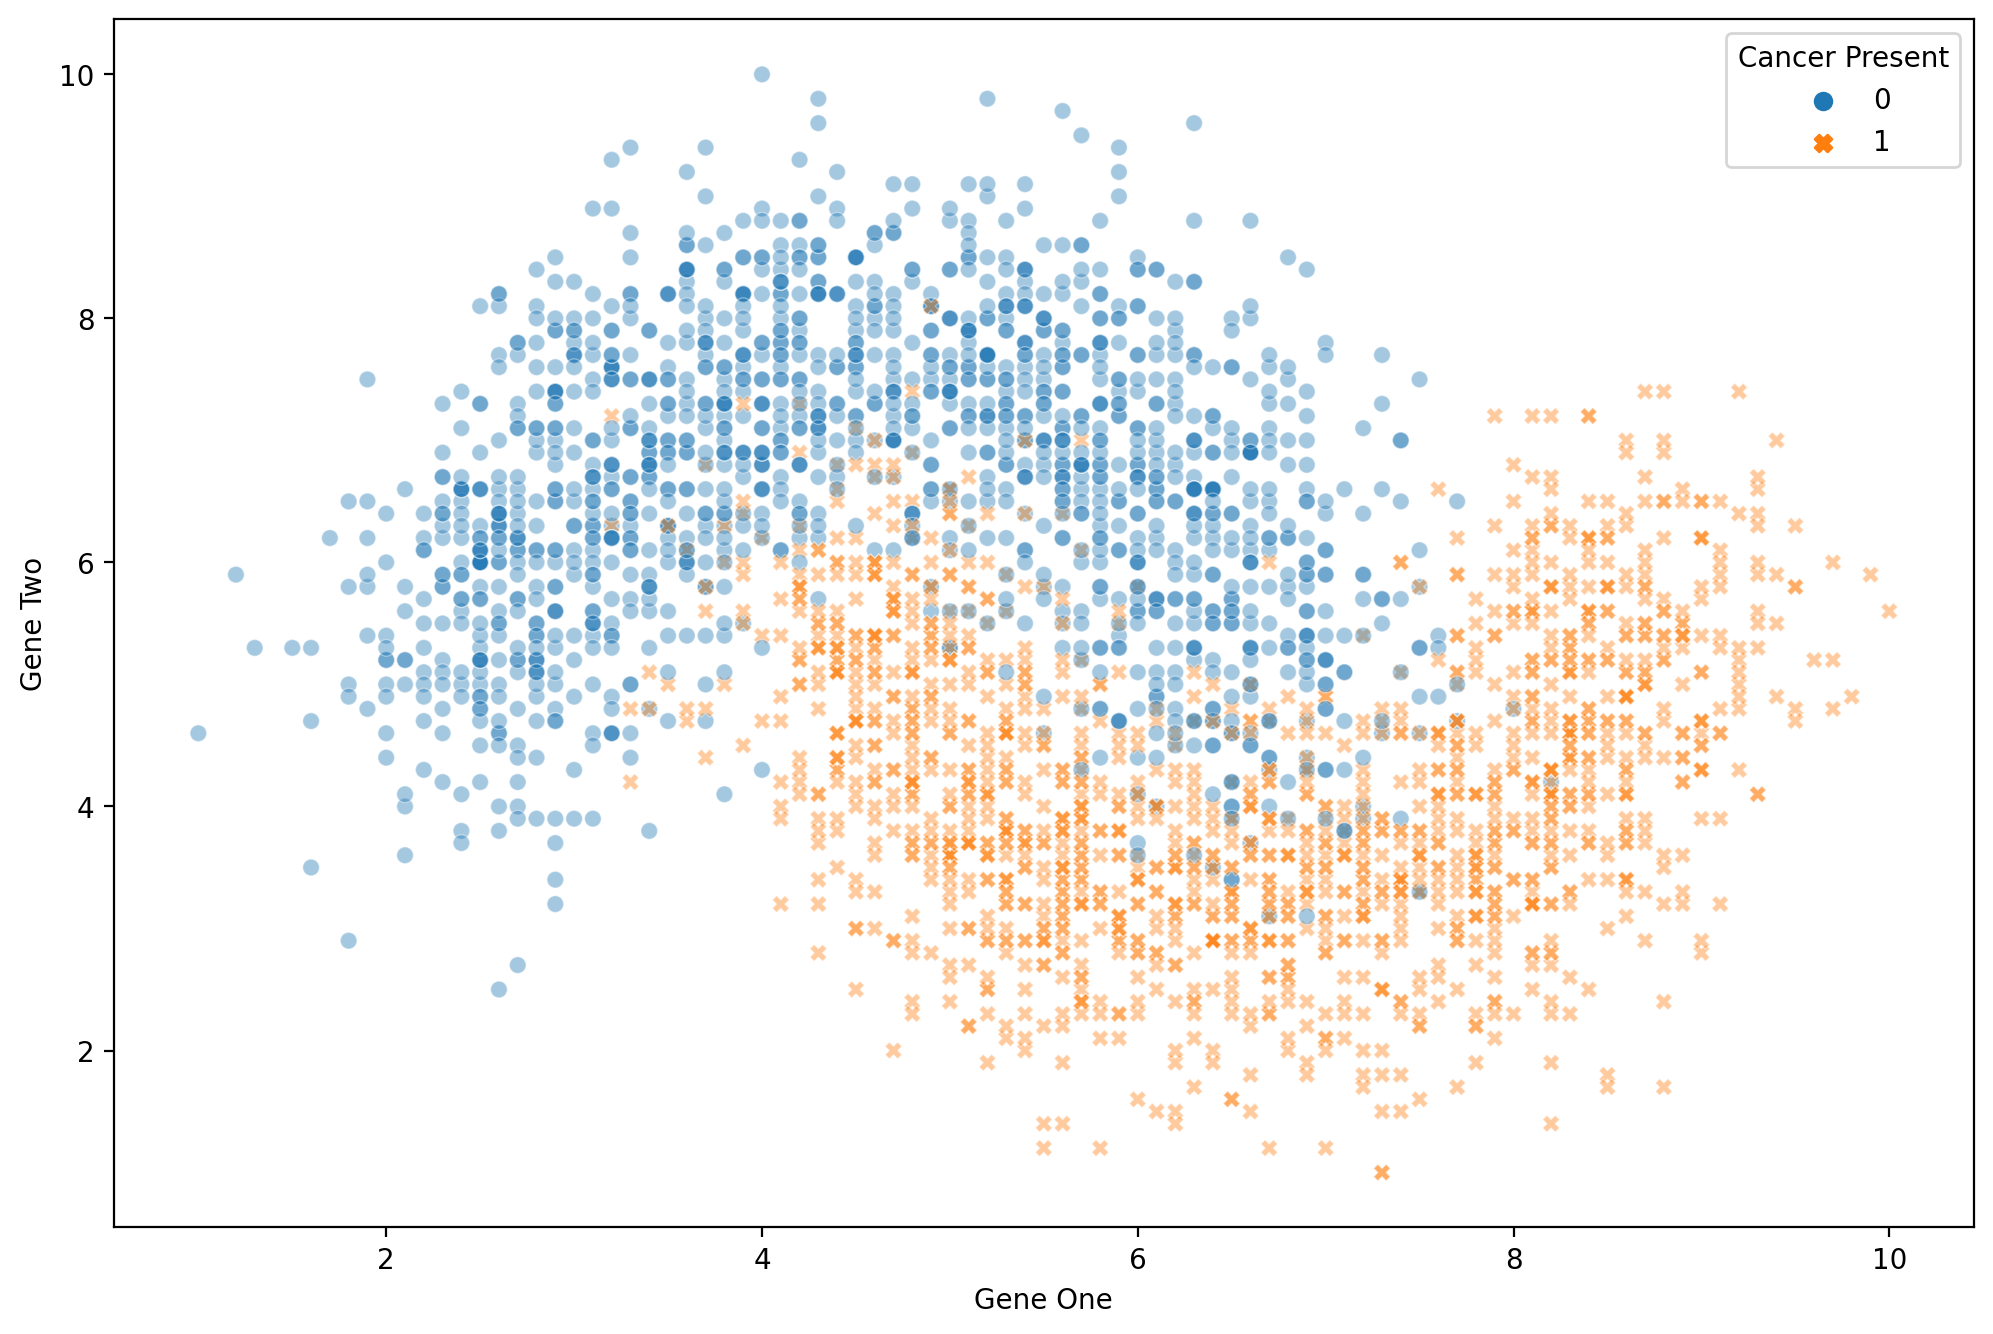

In [10]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.4, style='Cancer Present')

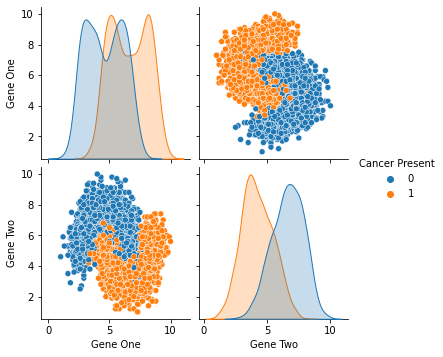

In [11]:
sns.pairplot(data=df, hue="Cancer Present")

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, plot_confusion_matrix, plot_roc_curve, SCORERS

In [28]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [13]:
X = df.drop('Cancer Present', axis=1)

In [14]:
y = df['Cancer Present']

In [15]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
knn = KNeighborsClassifier()

In [17]:
operations = [('scaler', scaler), ('knn', knn)]

In [21]:
pipe = Pipeline(operations)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
test_error = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    err = 1-accuracy_score(y_test, pred)
    test_error.append(err)

In [24]:
test_error

[0.09599999999999997,
 0.09199999999999997,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336,
 0.06799999999999995,
 0.06933333333333336,
 0.06533333333333335,
 0.06799999999999995,
 0.07199999999999995,
 0.07333333333333336,
 0.06933333333333336,
 0.07066666666666666,
 0.06933333333333336,
 0.07066666666666666,
 0.06666666666666665,
 0.06799999999999995,
 0.07066666666666666,
 0.06799999999999995,
 0.06799999999999995,
 0.06799999999999995,
 0.06799999999999995,
 0.06933333333333336,
 0.06666666666666665,
 0.06533333333333335,
 0.06666666666666665,
 0.06933333333333336,
 0.06399999999999995,
 0.06533333333333335]

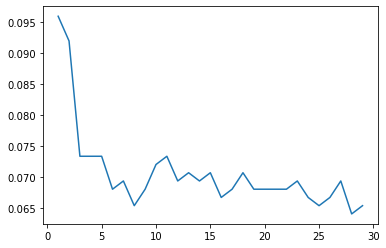

In [25]:
plt.plot(range(1, 30), test_error)

In [26]:
n = list(range(1, 30))
param_grid = {'knn__n_neighbors': n, 'knn__p' : [1,2,3], 'knn__metric': ['euclidean','manhattan','minkowski']}

In [29]:
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy', cv=10, verbose=2)

In [30]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 261 candidates, totalling 2610 fits
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=1 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=1, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=1, knn__p=2 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=3, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=3, knn__p=2 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=5, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=5, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=5, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=5, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=5, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=5, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=5, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=5, knn__p=3 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=7, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=7, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=7, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=7, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=7, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=7, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=7, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=7, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=7, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=7, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=7, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=7, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=7, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=7, knn__p=2 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=9, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=9, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=9, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=9, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=9, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=9, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=9, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=9, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=9, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=9, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=9, knn__p=2 .............
[CV]  knn__metric=euclidean, knn__n_neighbors=9, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=9, knn__p=2 ......

[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=11, knn__p=

[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=13, knn__p=2,

[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=15, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=15, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=17, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=17, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=17, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=17, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=17, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=19, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=19, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=19, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=19, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=19, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=19, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=19, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=19, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=19, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=21, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=21, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=21, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=21, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=21, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=23, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=23, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=23, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=23, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=23, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=23, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=23, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=23, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=23, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=23, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=23, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=23, knn__p=2 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=23, knn__p=2, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=23, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=25, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=25, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=27, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=27, knn__p=

[CV]  knn__metric=euclidean, knn__n_neighbors=28, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=28, knn__p=3 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=28, knn__p=3, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=1 ............
[CV]  knn__metric=euclidean, knn__n_neighbors=29, knn__p=1, total=   0.0s
[CV] knn__metric=euclidean, knn__n_neighbors=29, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=1, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=2, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=2, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=2, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=2, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=2, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=2, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=2, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=2, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=2, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=2, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=2, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=2, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=2, knn__p=1 ......

[CV]  knn__metric=manhattan, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=4, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=4, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=4, knn__p=1 ......

[CV]  knn__metric=manhattan, knn__n_neighbors=5, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=6, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=6, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=6, knn__p=1 ......

[CV]  knn__metric=manhattan, knn__n_neighbors=7, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=7, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=7, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=7, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=7, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=7, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=7, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=8, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=8, knn__p=1 ......

[CV]  knn__metric=manhattan, knn__n_neighbors=9, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=9, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=9, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=9, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=9, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=9, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=9, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=9, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=9, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=9, knn__p=3 .............
[CV]  knn__metric=manhattan, knn__n_neighbors=9, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=10, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=10, knn__p=1 ....

[CV]  knn__metric=manhattan, knn__n_neighbors=11, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=11, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=11, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=11, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=11, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=11, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=11, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=11, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=11, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=11, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=11, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=11, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=11, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=11, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=13, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=13, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=13, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=13, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=13, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=13, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=13, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=13, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=13, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=13, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=13, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=13, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=13, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=13, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=15, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=17, knn__p=

[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=19, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=19, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=20, knn__p=1,

[CV]  knn__metric=manhattan, knn__n_neighbors=21, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=21, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=21, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=21, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=21, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=21, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=21, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=21, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=21, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=21, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=21, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=22, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=23, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=23, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=24, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=25, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=25, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=25, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=27, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=27, knn__p=

[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=3 ............
[CV]  knn__metric=manhattan, knn__n_neighbors=29, knn__p=3, total=   0.0s
[CV] knn__metric=manhattan, knn__n_neighbors=29, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=2, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=2, knn__p=3 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=4, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=4, knn__p=3 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=6, knn__p=3 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=6, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=7, knn__p=1 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=7, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=7, knn__p=1 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=9, knn__p=1 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=9, knn__p=1 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=9, knn__p=1 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=9, knn__p=1 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=9, knn__p=1 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=9, knn__p=1 .............
[CV]  knn__metric=minkowski, knn__n_neighbors=9, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=9, knn__p=1 ......

[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=11, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=11, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=13, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=13, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=15, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=15, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=17, knn__p=3 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=17, knn__p=3, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=18, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=18, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=18, knn__p=

[CV] knn__metric=minkowski, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=20, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=20, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=20, knn__p=1,

[CV]  knn__metric=minkowski, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=22, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=22, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=22, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=22, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=22, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=22, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=22, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=22, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=22, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=24, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=24, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=24, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=24, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=24, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=24, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=24, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=24, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=24, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=24, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=24, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=24, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=24, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=24, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=26, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=26, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=26, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=26, knn__p=1 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=26, knn__p=1, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=26, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=26, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=26, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=26, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=26, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=26, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=26, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=26, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=26, knn__p=

[CV]  knn__metric=minkowski, knn__n_neighbors=28, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=28, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=28, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=28, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=28, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=28, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=28, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=28, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=28, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=28, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=28, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=28, knn__p=2 ............
[CV]  knn__metric=minkowski, knn__n_neighbors=28, knn__p=2, total=   0.0s
[CV] knn__metric=minkowski, knn__n_neighbors=28, knn__p=

[Parallel(n_jobs=1)]: Done 2610 out of 2610 | elapsed:   46.1s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29],
                         'knn__p': [1, 2, 3]},
             scoring='accuracy', verbose=2)

In [31]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [32]:
pred = grid.predict(X_test)

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       354
           1       0.93      0.94      0.93       396

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750



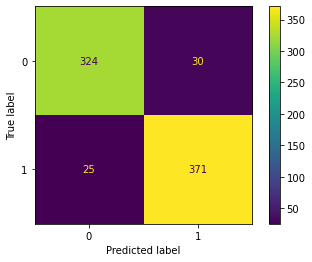

In [34]:
plot_confusion_matrix(grid, X_test, y_test)

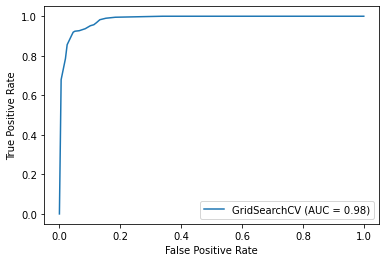

In [35]:
plot_roc_curve(grid, X_test, y_test)

In [38]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 15,
 'knn__p': 1,
 'knn__weights': 'uniform'}